<a href="https://colab.research.google.com/github/Mandeep132001/Coursework-/blob/main/Course_work_Section_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mandeep132001/Coursework-.git

Cloning into 'Coursework-'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 218.45 KiB | 3.31 MiB/s, done.
Resolving deltas: 100% (6/6), done.


#Importing and Combining Data: (2 Marks)

In [17]:
import pandas as pd
import numpy as np
mydata2 = pd.read_csv('/content/Coursework-/bookstore_transactions 3.csv')
mydata2 .head(4)

,Transaction ID,Customer ID,Book Title,Author,Genre,Purchase Method,Payment Method,Stock Before,Stock After,Loyalty Points,Promotion Applied,Discount Applied,Order Status,Restock Triggered
0,59b278fe,914e0b,1984,George Orwell,Dystopian,Online,Cash,25,22,30,"Buy 3 Books, Get 1 Free",0,Completed,No
1,8f90d6f6,c8d80d,Becoming,Michelle Obama,Biography,Online,Online Payment,14,12,20,"Buy 3 Books, Get 1 Free",0,Completed,No
2,a116662e,dba9d8,The Midnight Library,Matt Haig,Fantasy,Online,Cash,21,18,30,"Buy 3 Books, Get 1 Free",0,Completed,No
3,2db9cc65,7cdf6c,Dune,Frank Herbert,Sci-Fi,Online,Cash,26,24,20,Flat 50% Discount,50,Completed,No


In [9]:
import glob
path= glob.glob("/content/Coursework-/*.csv")
combined_files= pd.concat([pd.read_csv(file) for file in path], axis=1)
combined_files.head(3)

,Transaction ID,Customer ID,Book Title,Author,Genre,Purchase Method,Payment Method,Stock Before,Stock After,Loyalty Points,...,Office Location,Department,Idea Submission Date,Idea Title,Idea Category,Number of Votes,Collaboration Status,Approval Status,Implementation Status,Security Concern Flag
0,59b278fe,914e0b,1984,George Orwell,Dystopian,Online,Cash,25,22,30,...,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231.0,Single Contributor,Pending,Not Started,No
1,8f90d6f6,c8d80d,Becoming,Michelle Obama,Biography,Online,Online Payment,14,12,20,...,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477.0,Cross-Regional Team,Approved,In Progress,No
2,a116662e,dba9d8,The Midnight Library,Matt Haig,Fantasy,Online,Cash,21,18,30,...,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48.0,Cross-Regional Team,Approved,Not Started,Yes


In [12]:
print(f"No. of rows in combined files: {combined_files.shape[0]}")
print(f"Sum of rows of individual files: {sum([pd.read_csv(file).shape[0] for file in path])}")


No. of rows in combined files: 3500
Sum of rows of individual files: 6500


#Analyzing Data with NumPy and Pandas: (10 Marks)

Missing values check and handeling

In [13]:
mydata2.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Book Title,0
Author,0
Genre,0
Purchase Method,0
Payment Method,0
Stock Before,0
Stock After,0
Loyalty Points,0


In [15]:
mydata2.dropna().isnull().sum()


,0
Transaction ID,0
Customer ID,0
Book Title,0
Author,0
Genre,0
Purchase Method,0
Payment Method,0
Stock Before,0
Stock After,0
Loyalty Points,0


#Descriptive Statistics

In [20]:
print("Mean of Loyalty Points:", mydata2['Loyalty Points'].mean())
print("Median of Loyalty Points:", mydata2['Loyalty Points'].median())
print("Std Dev of Loyalty Points:", mydata2['Loyalty Points'].std())
print("Min of Loyalty Points:", mydata2['Loyalty Points'].min())
print("Max of Loyalty Points:", mydata2['Loyalty Points'].max())
print("Quantiles of Loyalty Points:\n", mydata2['Loyalty Points'].quantile([0.25, 0.5, 0.75]))

Mean of Loyalty Points: 13.631428571428572
Median of Loyalty Points: 10.0
Std Dev of Loyalty Points: 11.38010858256608
Min of Loyalty Points: 0
Max of Loyalty Points: 30
Quantiles of Loyalty Points:
 0.25     0.0
0.50    10.0
0.75    20.0
Name: Loyalty Points, dtype: float64


#Creating Plots for Numerical Features: (3 Marks)

#Frequency Curve

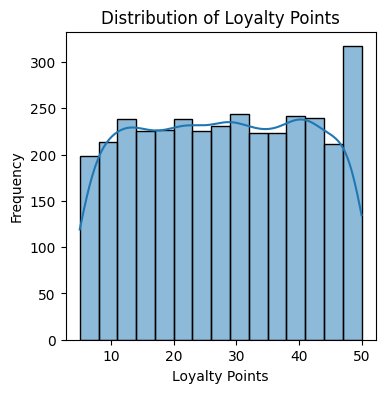

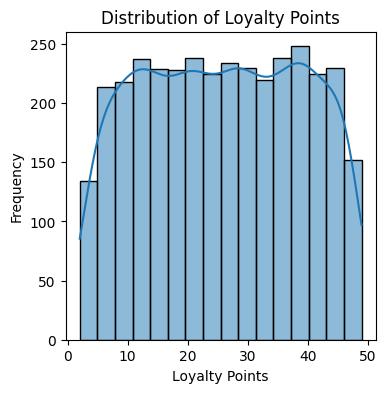

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram
plt.figure(figsize=(4, 4))
sns.histplot(mydata2['Stock Before'], kde=True)
plt.title("Distribution of Loyalty Points")
plt.xlabel("Loyalty Points")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(4, 4))
sns.histplot(mydata2['Stock After'], kde=True)
plt.title("Distribution of Loyalty Points")
plt.xlabel("Loyalty Points")
plt.ylabel("Frequency")
plt.show()

#Scatter plot

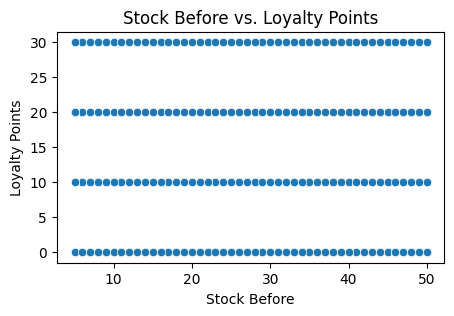

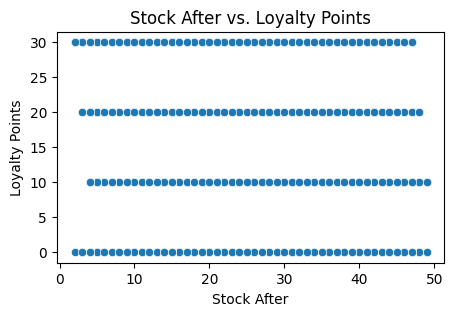

In [31]:
# Scatter plot
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Stock Before', y='Loyalty Points', data=mydata2)
plt.title("Stock Before vs. Loyalty Points")
plt.xlabel("Stock Before")
plt.ylabel("Loyalty Points")
plt.show()
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Stock After', y='Loyalty Points', data=mydata2)
plt.title("Stock After vs. Loyalty Points")
plt.xlabel("Stock After")
plt.ylabel("Loyalty Points")
plt.show()


#Pair Plot

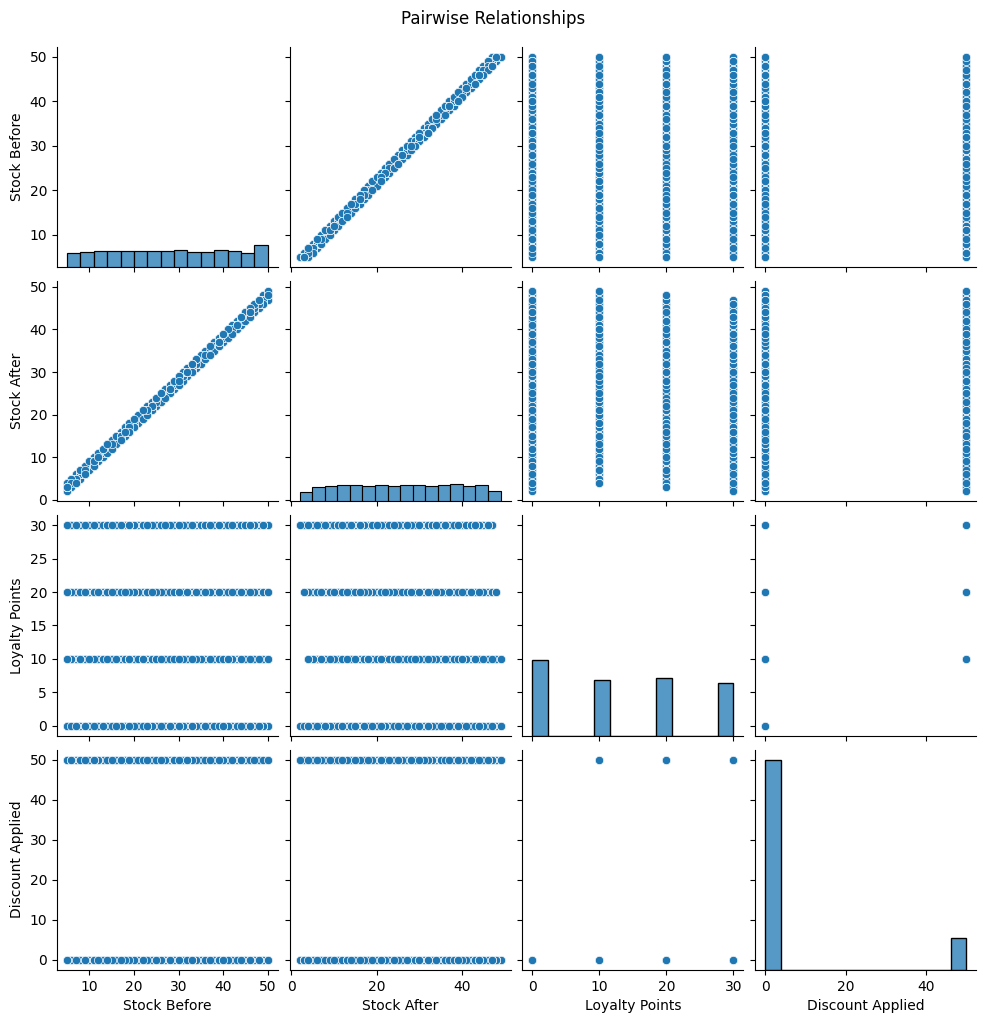

In [33]:
num_df = mydata2.select_dtypes(include=np.number)
sns.pairplot(num_df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


# Correlation matrix

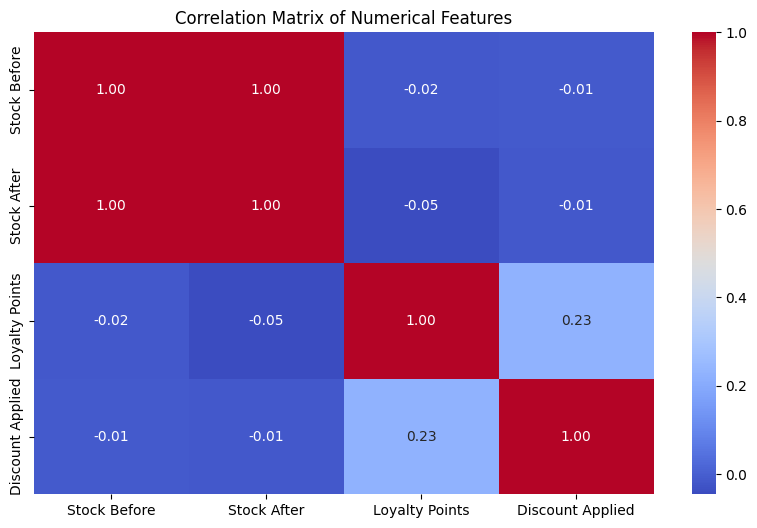

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()
